<a href="https://colab.research.google.com/github/wedja/Estudo_Caso/blob/main/dados_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1. Visualização dos dados

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
print('Feature names:', iris.feature_names)
print('Data shape:', iris.data.shape)
print('Target names:', iris.target_names)
print('Target shape:', iris.target.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data shape: (150, 4)
Target names: ['setosa' 'versicolor' 'virginica']
Target shape: (150,)


In [3]:
x = iris.data
y = iris.target

In [4]:
iris = load_iris(as_frame=True)
df = iris.frame
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
x = df.drop('target', axis=1) #Extrai a coluna alvo
display(x.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y = df['target'] #Elimina a colunade forma mais simples
display(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

Etapa 2. Visualização dos dados

In [8]:
import matplotlib.pyplot as plt

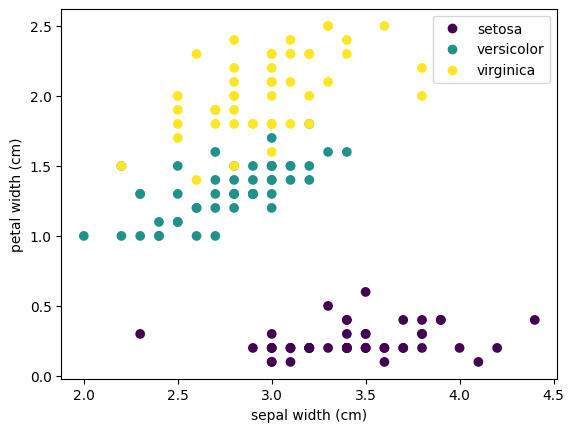

In [9]:
xy_plot = plt.scatter(x['sepal width (cm)'], x['petal width (cm)'], c=y)
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles=xy_plot.legend_elements()[0], labels=list(iris.target_names))
plt.show()

Etapa 3. Treinando o modelo

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [11]:
model = KNeighborsClassifier(n_neighbors=3)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=13)

In [13]:
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

Etapa 4. Avaliando os resultados

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_predicted = model.predict(xtest)
score = accuracy_score(ytest, y_predicted)
print(score)

0.9473684210526315


In [16]:
x_misclass = xtest[ytest != y_predicted]

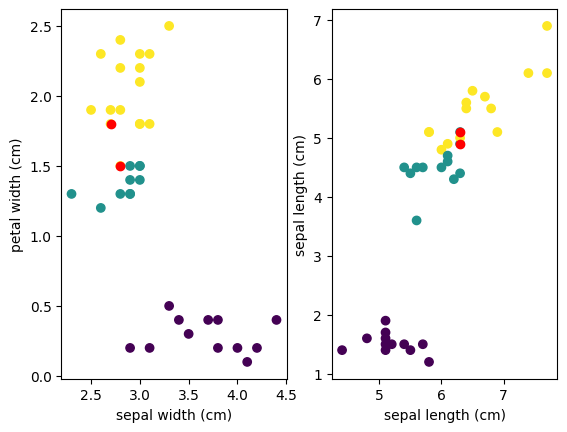

In [17]:
plt.subplot(1,2,1)

plt.scatter(xtest['sepal width (cm)'],
            xtest['petal width (cm)'], c=ytest)
plt.scatter(x_misclass['sepal width (cm)'],
            x_misclass['petal width (cm)'], c='r')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

plt.subplot(1,2,2)
plt.scatter(xtest['sepal length (cm)'],
            xtest['petal length (cm)'], c=y_predicted)
plt.scatter(x_misclass['sepal length (cm)'],
            x_misclass['petal length (cm)'], c='r')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal length (cm)')

plt.show()